Importing Modules

In [1]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import csv
import filters as f

Linking to databases

In [2]:
# Path to data file in csv format
data_file = "/home/gfemer/projects/ctb-sgravel/cartagene/research/quebec_structure_936028/data/old_metadata/data_Gravel936028_2.csv"
# Path to metadata info file in xlsx format
catalog_file = '/home/gfemer/projects/ctb-sgravel/cartagene/research/quebec_structure_936028/data/old_metadata/COMBINED_CATALOG_v2_9_6 - JUIL2020_0.xlsx'
# Path to phase2 country other codes
phase2_file = "/home/gfemer/storage/Cartagene/databases/phase2_country.txt"
# Path to ISO county code file
iso_file = "/home/gfemer/storage/Cartagene/databases/ISO_country_codes_edited_cartagene.txt"

In [5]:
# Relevant filter and sample
filters = "MOROCCO,ALGERIA,EGYPT,TUNISIA,SPAIN,FRANCE,PORTUGAL"
filters_AFR = "CONGO_DEMOCRATIC_REPUBLIC,CAMEROON,COTE_DIVOIRE"
samplepops = "FRENCH CANADIAN"

In [6]:
# Relevant fields
fields = "ethnic,country,BIRTHYEAR,IMMIGRATION"

filters = filters.split(",")
filters_AFR = filters_AFR.split(",")

samplepops = samplepops.split(",")
fields = "file111,PHASE,"+fields

In [3]:
fields = 'ethnic,country'
fields = "file111,PHASE,"+fields

In [4]:
data = f.parse_metadata(data_file,catalog_file,fields,drop_other=False)
data = f.correct_iso(data,phase2_file,iso_file,drop_other=True)

In [ ]:
NA_data= pd.DataFrame()
expression='MOTHERS|FATHERS'

In [39]:
filtered_columns = [col for col in data.columns if 'MOTHERS' in col or 'FATHERS' in col]

data['NGP_COUNTRY'] = data[filtered_columns].nunique(axis=1,dropna=False)

In [42]:
pop = data[['file111','Population']]

In [40]:
data['Population'] = "NA"
data.Population[data.NGP_COUNTRY == 1] = data.MOTHERS_MOTHER_COUNTRY_BIRTH[data.NGP_COUNTRY == 1]

/tmp/ipykernel_4002245/139211960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Population[data.NGP_COUNTRY == 1] = data.MOTHERS_MOTHER_COUNTRY_BIRTH[data.NGP_COUNTRY == 1]


In [ ]:

# data['NGP_COUNTRY_INTEREST'] = data[filtered_columns].isin(filters_AFR).sum(axis=1)
# print("Total individuals extracted with AFR ancestry ", len(data_AFR))

# Extract individuals with total ancestry
data_GP= data_AFR[data_AFR.NGP_COUNTRY_INTEREST == 4].copy()
data_AFR['Population'] = data_AFR.MOTHERS_MOTHER_COUNTRY_BIRTH

print("Total number of AFR individuals retained: ", len(data_AFR))

print(data_AFR.Population.value_counts())

In [9]:
# Check for Mixed Ancestry in the grandparents
NA_data= pd.DataFrame()
expression='MOTHERS|FATHERS'

data_all = f.filter_by_value(data,filters)

Count number of grandparents in filters

In [11]:
# Find columns with 'MOTHERS' or 'FATHERS' in their names
filtered_columns = [col for col in data_all.columns if 'MOTHERS' in col or 'FATHERS' in col]

data_all['NGP_COUNTRY_INTEREST'] = data_all[filtered_columns].isin(filters).sum(axis=1)

print("Total individuals extracted ", len(data_all))

# Extract individuals with total ancestry
#data_med_totalancs = data_all[data_all.NGP_COUNTRY_INTEREST == 4].copy()

# Removing individuals with none to only one grandparent in the countries of interest
data_med = data_all[data_all.NGP_COUNTRY_INTEREST > 1].copy()

data_med_totalancs = data_med[data_med[filtered_columns].nunique(axis=1) == 1]

#data_all[data_all.NGP_COUNTRY_INTEREST == 4].copy()

data_med_totalancs['Population'] = data_med_totalancs.MOTHERS_MOTHER_COUNTRY_BIRTH
print("Total inds. with full Mediterranean ancestry: ",len(data_med_totalancs))

print("Total indvs. with at least two grandparents born in the mediterranean ", len(data_med))
print("0 Granparents: ", len(data_all[data_all.NGP_COUNTRY_INTEREST == 0]))
print("1 Granparent: ", len(data_all[data_all.NGP_COUNTRY_INTEREST == 1]))
print("2 Granparents: ", len(data_all[data_all.NGP_COUNTRY_INTEREST == 2]))
print("3 Granparents: ", len(data_all[data_all.NGP_COUNTRY_INTEREST == 3]))
print("4 Granparents: ", len(data_all[data_all.NGP_COUNTRY_INTEREST == 4]))
print("4 Grandparents born in the same country",(data_med[filtered_columns].nunique(axis=1) == 1).sum())

print("Total retained after removing 0-1 gps: ", len(data_med))

Total individuals extracted  1860
Total inds. with full Mediterranean ancestry:  1059
Total indvs. with at least two grandparents born in the mediterranean  1469
0 Granparents:  130
1 Granparent:  261
2 Granparents:  273
3 Granparents:  77
4 Granparents:  1119
4 Grandparents born in the same country 1059
Total retained after removing 0-1 gps:  1469


/tmp/ipykernel_69677/1281657633.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_med_totalancs['Population'] = data_med_totalancs.MOTHERS_MOTHER_COUNTRY_BIRTH


In [12]:
data_med['Population'] = data_med[filtered_columns].mode(axis=1).iloc[:,0]

In [13]:
# Check if there are multiple unique values, and if so, add "_PA"
unique_values = data_med[filtered_columns].nunique(axis=1)
# Check which "population values are not in the filters
idx_notinPop = ~data_med['Population'].isin(filters)

data_med.loc[(unique_values > 1) & (data_med.Population.isin(filters)), 'Population'] = data_med.loc[unique_values > 1 & data_med.Population.isin(filters), 'Population'] + "_PA"
data_med.loc[idx_notinPop, 'Population'] = data_med.loc[idx_notinPop, filtered_columns].mode(axis=1).iloc[:,1] + "_PA"


In [14]:
data_med.loc[data_med.Population.isna(),'Population'] = "Mixed_PA"

Adding the Subsaharan African ancestry individuals

In [11]:
data_AFR = f.filter_by_value(data,filters_AFR)


In [12]:
# Find columns with 'MOTHERS' or 'FATHERS' in their names
filtered_columns = [col for col in data_all.columns if 'MOTHERS' in col or 'FATHERS' in col]

data_AFR['NGP_COUNTRY_INTEREST'] = data_AFR[filtered_columns].isin(filters_AFR).sum(axis=1)
print("Total individuals extracted with AFR ancestry ", len(data_AFR))

# Extract individuals with total ancestry
data_AFR = data_AFR[data_AFR.NGP_COUNTRY_INTEREST == 4].copy()
data_AFR['Population'] = data_AFR.MOTHERS_MOTHER_COUNTRY_BIRTH

print("Total number of AFR individuals retained: ", len(data_AFR))

print(data_AFR.Population.value_counts())

Total individuals extracted with AFR ancestry  87
Total number of AFR individuals retained:  60
CONGO_DEMOCRATIC_REPUBLIC    25
CAMEROON                     22
COTE_DIVOIRE                 13
Name: Population, dtype: int64


Sampling French Canadian

In [13]:
FC = f.sample_pop(data, samplepops=samplepops, samplen=30, avoid=["ABORIGINAL"])

In [14]:
FC['Population'] = "FRENCH_CANADIAN"

Write Keep file to extract from plink

In [15]:
data_med.NGP_COUNTRY_INTEREST.value_counts()

4    1119
2     273
3      77
Name: NGP_COUNTRY_INTEREST, dtype: int64

In [178]:
f.write_keep("/home/gfemer/storage/Cartagene/Mediterranean/panel/gsa_merge_hg38.mediterranean.AFR.FC.all.keep", data_med, data_AFR,FC)

/home/gfemer/storage/Cartagene/Mediterranean/panel/gsa_merge_hg38.mediterranean.AFR.FC.all.keep already exists, overwritting
        file111                  phase  COUNTRY_BIRTH MOTHER_COUNTRY_BIRTH  \
15     11135331                PHASE A         CANADA               CANADA   
16     11115602                PHASE A        ALGERIA              ALGERIA   
17     11141096                PHASE A         FRANCE               FRANCE   
39     11128733                PHASE A         CANADA                ITALY   
63     11117479                PHASE A         CANADA                ITALY   
...         ...                    ...            ...                  ...   
29277  11105845                PHASE A         CANADA               CANADA   
29283  11110453                PHASE A         CANADA                ITALY   
29295  11108621  PHASE B - SECOND WAVE       PORTUGAL             PORTUGAL   
29309  11136177                PHASE A         CANADA               CANADA   
29336  11103995  

Write keep with only full ancestry indvs

In [39]:
f.write_keep("/home/gfemer/storage/Cartagene/Mediterranean/panel/gsa_merge_hg38.mediterranean.noMix.AFR.FC.all.2.keep", data_med_totalancs, data_AFR,FC)

Check Self-identification in Morocco

In [17]:
Mor_J = pd.read_table("/home/gfemer/storage/Cartagene/Mediterranean/results/admixture/admxture-subsample/gsa_merge_hg38.mediterranean.MOROCCO.JewishK.updateID.txt",header=None,sep=" ")
Mor_J[1] = Mor_J[1].astype(str)

Questionaire data exploration

In [20]:
# Convert 'BIRTHYEAR' to numeric
data_med['BIRTHYEAR'] = pd.to_numeric(data_med['BIRTHYEAR'], errors='coerce')  # 'coerce' converts non-numeric values to NaN
data_med['AGE_IMMIGRATION_YEAR'] = pd.to_numeric(data_med['AGE_IMMIGRATION_YEAR'], downcast = 'integer', errors='coerce')  # 'coerce' converts non-numeric values to NaN
data_med['AGE_IMMIGRATION_AGE'] = pd.to_numeric(data_med['AGE_IMMIGRATION_AGE'], downcast = 'integer', errors='coerce')  # 'coerce' converts non-numeric values to NaN


In [21]:
data_morocco_all = data_med[data_med.Population == "MOROCCO"]
data_morocco_all.loc[data_morocco_all["file111"].isin(Mor_J[1].to_list()),"Population"] = "MOROCCO_J"

In [22]:
data_morocco_all.loc[data_morocco_all['AGE_IMMIGRATION'] == 'AGE','AGE_IMMIGRATION_YEAR'] = data_morocco_all.loc[data_morocco_all['AGE_IMMIGRATION'] == 'AGE','AGE_IMMIGRATION_AGE'] + data_morocco_all.loc[data_morocco_all['AGE_IMMIGRATION'] == 'AGE','BIRTHYEAR']

In [23]:
stats = data_morocco_all.groupby(["Population","COUNTRY_BIRTH"])[['BIRTHYEAR','AGE_IMMIGRATION_YEAR']].agg(['count','mean','median','std']).round(2)

In [24]:
stats

BIRTHYEAR                         \
                             count     mean  median   std   
Population COUNTRY_BIRTH                                    
MOROCCO    ALGERIA               1  1951.00  1951.0   NaN   
           MOROCCO             163  1962.09  1963.0  6.52   
MOROCCO_J  CANADA                2  1967.50  1967.5  0.71   
           FRANCE                4  1966.50  1967.5  2.38   
           MOROCCO              31  1951.00  1949.0  7.61   

                         AGE_IMMIGRATION_YEAR                          
                                        count     mean  median    std  
Population COUNTRY_BIRTH                                               
MOROCCO    ALGERIA                          1  1974.00  1974.0    NaN  
           MOROCCO                        163  1998.02  2001.0   9.03  
MOROCCO_J  CANADA                           0      NaN     NaN    NaN  
           FRANCE                           4  1993.00  1992.5   3.16  
           MOROCCO                         31  1977.84  1974.0  11.70

In [33]:
data_morocco_all.loc[data_morocco_all.BIRTHYEAR > 1965].groupby(["Population","COUNTRY_BIRTH"]).agg('count')

file111  phase  BIRTHYEAR  AGE_IMMIGRATION  \
Population COUNTRY_BIRTH                                               
MOROCCO    MOROCCO             56     56         56               56   
MOROCCO_J  CANADA               2      2          2                2   
           FRANCE               3      3          3                3   
           MOROCCO              2      2          2                2   

                          AGE_IMMIGRATION_AGE  AGE_IMMIGRATION_YEAR  \
Population COUNTRY_BIRTH                                              
MOROCCO    MOROCCO                         24                    56   
MOROCCO_J  CANADA                           0                     0   
           FRANCE                           0                     3   
           MOROCCO                          1                     2   

                          MOTHER_COUNTRY_BIRTH  FATHER_COUNTRY_BIRTH  \
Population COUNTRY_BIRTH                                               
MOROCCO    MOROCCO                          56                    56   
MOROCCO_J  CANADA                            2                     2   
           FRANCE                            3                     3   
           MOROCCO                           2                     2   

                          MOTHERS_MOTHER_COUNTRY_BIRTH  \
Population COUNTRY_BIRTH                                 
MOROCCO    MOROCCO                                  56   
MOROCCO_J  CANADA                                    2   
           FRANCE                                    3   
           MOROCCO                                   2   

                          MOTHERS_FATHER_COUNTRY_BIRTH  ...  ETHNICITY_ME  \
Population COUNTRY_BIRTH                                ...                 
MOROCCO    MOROCCO                                  56  ...            56   
MOROCCO_J  CANADA                                    2  ...             2   
           FRANCE                                    3  ...             3   
           MOROCCO                                   2  ...             2   

                          ETHNICITY_CORRECT_ME  ETHNICITY_MOTHER  \
Population COUNTRY_BIRTH                                           
MOROCCO    MOROCCO                          56                56   
MOROCCO_J  CANADA                            2                 2   
           FRANCE                            3                 3   
           MOROCCO                           2                 2   

                          ETHNICITY_CORRECT_MOTHER  ETHNICITY_FATHER  \
Population COUNTRY_BIRTH                                               
MOROCCO    MOROCCO                              56                56   
MOROCCO_J  CANADA                                2                 2   
           FRANCE                                3                 3   
           MOROCCO                               2                 2   

                          ETHNICITY_CORRECT_FATHER  IMPUTED_ETHNIC_CB  \
Population COUNTRY_BIRTH                                                
MOROCCO    MOROCCO                              56                 56   
MOROCCO_J  CANADA                                2                  2   
           FRANCE                                3                  3   
           MOROCCO                               2                  2   

                          IMPUTED_ETHNIC2_CB  ETHNIC_FR_CB  \
Population COUNTRY_BIRTH                                     
MOROCCO    MOROCCO                        56            56   
MOROCCO_J  CANADA                          2             2   
           FRANCE                          3             3   
           MOROCCO                         2             2   

                          NGP_COUNTRY_INTEREST  
Population COUNTRY_BIRTH                        
MOROCCO    MOROCCO                          56  
MOROCCO_J  CANADA                            2  
           FRANCE                            3  
           MOROCCO    

In [191]:
stats.reset_index().to_csv("Morocco_stats_year.csv")


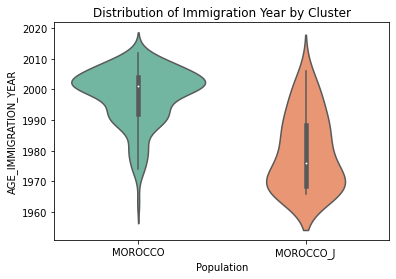

In [30]:
import seaborn as sns

sns.violinplot(x='Population', y='AGE_IMMIGRATION_YEAR', data=data_morocco_all, palette='Set2',dpi=150 )
plt.title('Distribution of Immigration Year by Cluster')
plt.savefig("ViolinPlot_Moroccoall_by_immigrationyear_all.png",dpi=200)

In [44]:
data_morocco_all.loc[data_morocco_all.Population == "MOROCCO",'Cluster'] = "1"
data_morocco_all.loc[data_morocco_all.Population == "MOROCCO_J",'Cluster'] = "2"
#[1 data_morocco_all.Population == "MOROCCO"] 

/tmp/ipykernel_2877959/3146465728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_morocco_all.loc[data_morocco_all.Population == "MOROCCO",'Cluster'] = "1"


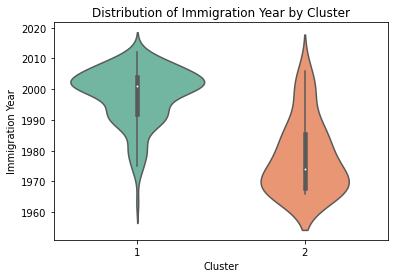

In [45]:
sns.violinplot(x='Cluster', y='AGE_IMMIGRATION_YEAR', 
               data=data_morocco_all[data_morocco_all.COUNTRY_BIRTH == "MOROCCO"], 
               palette='Set2')
#plt.set_axis_labels("Cluster1","Cluster2")
plt.title('Distribution of Immigration Year by Cluster')
plt.ylabel("Immigration Year")
plt.xlabel("Cluster")
plt.savefig("ViolinPlot_Moroccoall_by_immigrationyear.png",dpi=200)

In [149]:
data_morocco_all[data_morocco_all.Population == "MOROCCO_J"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.mean()

/tmp/ipykernel_2171628/4255862903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_morocco_all[data_morocco_all.Population == "MOROCCO_J"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.mean()


1951.0

In [145]:
data_morocco_all[data_morocco_all.Population == "MOROCCO"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.mean()

/tmp/ipykernel_2171628/3439760442.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_morocco_all[data_morocco_all.Population == "MOROCCO"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.mean()


1962.0920245398772

In [147]:
data_morocco_all[data_morocco_all.Population == "MOROCCO"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.std()

/tmp/ipykernel_2171628/1621696254.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_morocco_all[data_morocco_all.Population == "MOROCCO"][data_morocco_all.COUNTRY_BIRTH == "MOROCCO"].BIRTHYEAR.std()


6.522335618880709

In [94]:
data_J = data_med[data_med["file111"].isin(Mor_J[1].to_list())][data_med.Population == "MOROCCO"]

/tmp/ipykernel_2171628/1920899503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_J = data_med[data_med["file111"].isin(Mor_J[1].to_list())][data_med.Population == "MOROCCO"]


In [51]:
import seaborn as sns

In [116]:
data_J.ETHNICITY_CORRECT_ME.value_counts()

NA                 24
jewish              4
whitejewish         3
arab                1
other               1
white               1
whitearabjewish     1
 jewish             1
arabjewish          1
Name: ETHNICITY_CORRECT_ME, dtype: int64

<AxesSubplot:xlabel='BIRTHYEAR', ylabel='Count'>

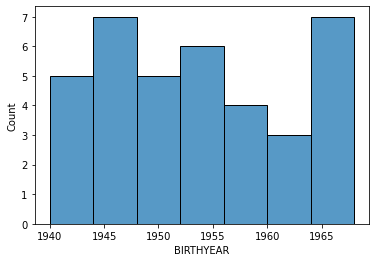

In [113]:
sns.histplot(data_J.BIRTHYEAR)

In [120]:
data_med[data_med.Population == "MOROCCO"].AGE_IMMIGRATION.value_counts()

YEAR              126
AGE                73
Not applicable      2
Name: AGE_IMMIGRATION, dtype: int64

In [115]:
data_J[data_J.BIRTHYEAR > 1965]

,file111,phase,BIRTHYEAR,AGE_IMMIGRATION,AGE_IMMIGRATION_AGE,AGE_IMMIGRATION_YEAR,COUNTRY_BIRTH,MOTHER_COUNTRY_BIRTH,FATHER_COUNTRY_BIRTH,MOTHERS_MOTHER_COUNTRY_BIRTH,...,ETHNICITY_CORRECT_ME,ETHNICITY_MOTHER,ETHNICITY_CORRECT_MOTHER,ETHNICITY_FATHER,ETHNICITY_CORRECT_FATHER,IMPUTED_ETHNIC_CB,IMPUTED_ETHNIC2_CB,ETHNIC_FR_CB,NGP_COUNTRY_INTEREST,Population
594,11108292,PHASE A,1967,YEAR,NA,1967.0,MOROCCO,MOROCCO,MOROCCO,MOROCCO,...,NA,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
3662,11135464,PHASE A,1967,Not applicable,NA,NaN,CANADA,MOROCCO,MOROCCO,MOROCCO,...,whitearabjewish,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
4816,11124237,PHASE A,1966,AGE,19,NaN,MOROCCO,MOROCCO,MOROCCO,MOROCCO,...,NA,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
6031,11110199,PHASE A,1967,YEAR,NA,1991.0,FRANCE,MOROCCO,MOROCCO,MOROCCO,...,NA,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
15920,11102077,PHASE A,1968,Not applicable,NA,NaN,CANADA,MOROCCO,MOROCCO,MOROCCO,...,NA,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
16552,11124960,PHASE A,1968,YEAR,NA,1994.0,FRANCE,MOROCCO,MOROCCO,MOROCCO,...,jewish,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO
17271,11100406,PHASE A,1968,YEAR,NA,1990.0,FRANCE,MOROCCO,MOROCCO,MOROCCO,...,NA,NA,NA,NA,NA,ARAB,ARAB,OTHER,4,MOROCCO


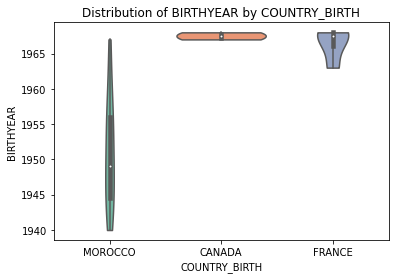

In [114]:
sns.violinplot(x='COUNTRY_BIRTH', y='BIRTHYEAR', data=data_J, palette='Set2',cut=0)
plt.title('Distribution of BIRTHYEAR by COUNTRY_BIRTH')
plt.savefig("ViolinPlot_MoroccoJ_by_birthyear.jpg")


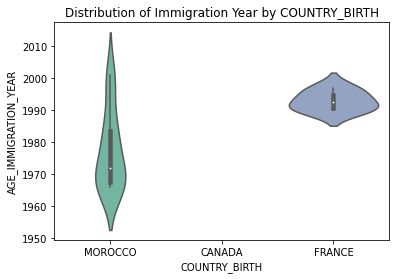

In [98]:

sns.violinplot(x='COUNTRY_BIRTH', y='AGE_IMMIGRATION_YEAR', data=data_J, palette='Set2')
plt.title('Distribution of Immigration Year by COUNTRY_BIRTH')
plt.savefig("ViolinPlot_MoroccoJ_by_immigrationyear.jpg")

/tmp/ipykernel_2171628/3998411171.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_morocco = data_med[~data_med["file111"].isin(Mor_J[1].to_list())][data_med.Population == "MOROCCO"]


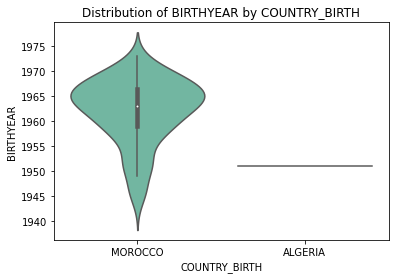

In [100]:
data_morocco = data_med[~data_med["file111"].isin(Mor_J[1].to_list())][data_med.Population == "MOROCCO"]

sns.violinplot(x='COUNTRY_BIRTH', y='BIRTHYEAR', data=data_morocco, palette='Set2')
plt.title('Distribution of BIRTHYEAR by COUNTRY_BIRTH')
plt.savefig("ViolinPlot_MoroccoArab_by_birthyear.jpg")

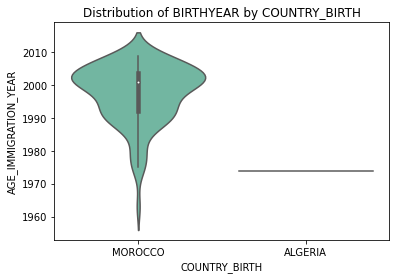

In [101]:

sns.violinplot(x='COUNTRY_BIRTH', y='AGE_IMMIGRATION_YEAR', data=data_morocco, palette='Set2')
plt.title('Distribution of BIRTHYEAR by COUNTRY_BIRTH')
plt.savefig("ViolinPlot_MoroccoArab_by_immigrationyear.jpg")